In [1]:
import pandas as pd
weather = pd.read_csv("local_weather.csv", index_col="DATE")
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1960-01-01,KZ000036870,"ALMATY, KZ",0.00,NaN,28.0,43.0,16.0
1960-01-02,KZ000036870,"ALMATY, KZ",0.00,NaN,35.0,48.0,27.0
1960-01-03,KZ000036870,"ALMATY, KZ",0.00,NaN,27.0,38.0,20.0
1960-01-04,KZ000036870,"ALMATY, KZ",0.00,NaN,31.0,40.0,18.0
1960-01-05,KZ000036870,"ALMATY, KZ",0.02,NaN,30.0,47.0,29.0
...,...,...,...,...,...,...,...
2024-02-24,KZ000036870,"ALMATY, KZ",NaN,NaN,19.0,24.0,16.0
2024-02-25,KZ000036870,"ALMATY, KZ",NaN,NaN,19.0,23.0,17.0
2024-02-26,KZ000036870,"ALMATY, KZ",NaN,NaN,19.0,24.0,16.0


In [2]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.244787
SNWD       0.882762
TAVG       0.017307
TMAX       0.008285
TMIN       0.061864
dtype: float64

In [3]:
core_weather = weather[[ "TAVG", "TMAX", "TMIN"]].copy()
core_weather.columns = ["temp_avg", "temp_max", "temp_min"]
core_weather

,temp_avg,temp_max,temp_min
DATE,,,
1960-01-01,28.0,43.0,16.0
1960-01-02,35.0,48.0,27.0
1960-01-03,27.0,38.0,20.0
1960-01-04,31.0,40.0,18.0
1960-01-05,30.0,47.0,29.0
...,...,...,...
2024-02-24,19.0,24.0,16.0
2024-02-25,19.0,23.0,17.0
2024-02-26,19.0,24.0,16.0


In [6]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

temp_avg    0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [5]:
core_weather = core_weather.fillna(method="ffill")

In [7]:
core_weather

,temp_avg,temp_max,temp_min
DATE,,,
1960-01-01,28.0,43.0,16.0
1960-01-02,35.0,48.0,27.0
1960-01-03,27.0,38.0,20.0
1960-01-04,31.0,40.0,18.0
1960-01-05,30.0,47.0,29.0
...,...,...,...
2024-02-24,19.0,24.0,16.0
2024-02-25,19.0,23.0,17.0
2024-02-26,19.0,24.0,16.0


In [8]:
core_weather.dtypes

temp_avg    float64
temp_max    float64
temp_min    float64
dtype: object

In [9]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22', '2024-02-23',
       '2024-02-24', '2024-02-25', '2024-02-26', '2024-02-27', '2024-03-03'],
      dtype='object', name='DATE', length=21725)

In [10]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 3],
           dtype='int64', name='DATE', length=21725)

In [11]:
core_weather.apply(lambda x: (x==9999).sum())

temp_avg    0
temp_max    0
temp_min    0
dtype: int64

In [12]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2020    366
2021    360
2022    365
2023    365
2024     59
Name: DATE, Length: 61, dtype: int64

In [13]:
# Convert temperature columns from Fahrenheit to Celsius
core_weather['temp_avg_C'] = (core_weather['temp_avg'] - 32) * 5/9
core_weather['temp_max_C'] = (core_weather['temp_max'] - 32) * 5/9
core_weather['temp_min_C'] = (core_weather['temp_min'] - 32) * 5/9
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C
DATE,,,,,,
1960-01-01,28.0,43.0,16.0,-2.222222,6.111111,-8.888889
1960-01-02,35.0,48.0,27.0,1.666667,8.888889,-2.777778
1960-01-03,27.0,38.0,20.0,-2.777778,3.333333,-6.666667
1960-01-04,31.0,40.0,18.0,-0.555556,4.444444,-7.777778
1960-01-05,30.0,47.0,29.0,-1.111111,8.333333,-1.666667
...,...,...,...,...,...,...
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333
2024-02-26,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889


<Axes: xlabel='DATE'>

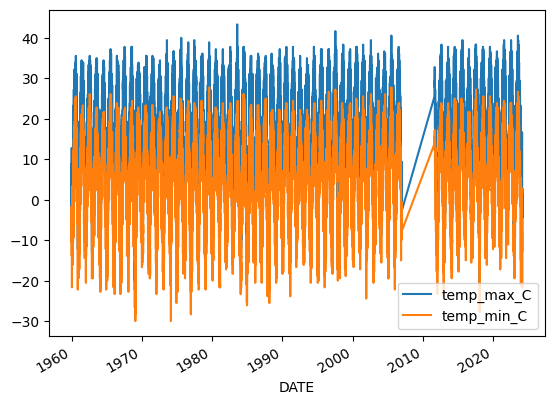

In [14]:
core_weather[["temp_max_C", "temp_min_C"]].plot()

In [15]:
core_weather.dtypes

temp_avg      float64
temp_max      float64
temp_min      float64
temp_avg_C    float64
temp_max_C    float64
temp_min_C    float64
dtype: object

<Axes: xlabel='DATE'>

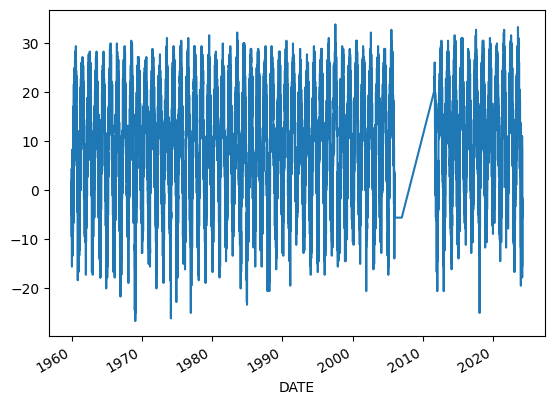

In [16]:
core_weather["temp_avg_C"].plot()

In [17]:
core_weather["target"] = core_weather.shift(-1)["temp_max_C"]
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target
DATE,,,,,,,
1960-01-01,28.0,43.0,16.0,-2.222222,6.111111,-8.888889,8.888889
1960-01-02,35.0,48.0,27.0,1.666667,8.888889,-2.777778,3.333333
1960-01-03,27.0,38.0,20.0,-2.777778,3.333333,-6.666667,4.444444
1960-01-04,31.0,40.0,18.0,-0.555556,4.444444,-7.777778,8.333333
1960-01-05,30.0,47.0,29.0,-1.111111,8.333333,-1.666667,2.222222
...,...,...,...,...,...,...,...
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444
2024-02-26,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-1.666667


In [18]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target
DATE,,,,,,,
1960-01-01,28.0,43.0,16.0,-2.222222,6.111111,-8.888889,8.888889
1960-01-02,35.0,48.0,27.0,1.666667,8.888889,-2.777778,3.333333
1960-01-03,27.0,38.0,20.0,-2.777778,3.333333,-6.666667,4.444444
1960-01-04,31.0,40.0,18.0,-0.555556,4.444444,-7.777778,8.333333
1960-01-05,30.0,47.0,29.0,-1.111111,8.333333,-1.666667,2.222222
...,...,...,...,...,...,...,...
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444


In [19]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

predictors = ["temp_avg_C", "temp_max_C", "temp_min_C"]
train = core_weather.loc[:"2018-12-31"]
test = core_weather.loc["2019-01-01":]

reg.fit(train[predictors], train["target"])
Ridge(alpha=0.1)
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target"], predictions)

3.1036914481188336

In [20]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns=["actual", "predictions"]
combined

,actual,predictions
DATE,,
2019-01-01,1.666667,-2.095096
2019-01-02,2.777778,2.695849
2019-01-03,6.666667,3.620341
2019-01-04,-2.777778,6.946399
2019-01-05,-0.555556,-1.181200
...,...,...
2024-02-23,-4.444444,3.216607
2024-02-24,-5.000000,-3.016442
2024-02-25,-4.444444,-3.433917


<Axes: xlabel='DATE'>

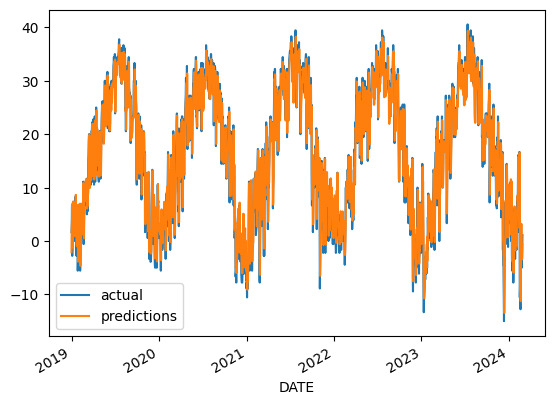

In [21]:
combined.plot()

In [22]:
reg.coef_

array([0.1106287 , 0.80200111, 0.05054638])

In [23]:
def create_predictions(predictions, core_weather, reg):
  train = core_weather.loc[:"2018-12-31"]
  test = core_weather.loc["2019-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns=["actual", "predictions"]
  return error, combined

In [26]:
core_weather["month_max"] = core_weather["temp_max_C"].rolling(30).mean()
core_weather["month_day_max"] = core_weather["month_max"] / (core_weather["temp_max_C"] + 1e-10)
core_weather["max_min"] = core_weather["temp_max_C"] / (core_weather["temp_min_C"] + 1e-10)
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_max", "month_day_max", "max_min"]



In [29]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min
DATE,,,,,,,,,,
1960-01-31,26.0,37.0,18.0,-3.333333,2.777778,-7.777778,6.666667,2.000000,0.720000,-0.357143
1960-02-01,29.0,44.0,18.0,-1.666667,6.666667,-7.777778,8.333333,1.925926,0.288889,-0.857143
1960-02-02,31.0,47.0,27.0,-0.555556,8.333333,-2.777778,5.555556,2.092593,0.251111,-3.000000
1960-02-03,33.0,42.0,24.0,0.555556,5.555556,-4.444444,10.555556,2.129630,0.383333,-1.250000
1960-02-04,39.0,51.0,27.0,3.888889,10.555556,-2.777778,11.666667,2.203704,0.208772,-3.800000
...,...,...,...,...,...,...,...,...,...,...
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444,3.203704,1.153333,-0.250000
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000,2.851852,-0.641667,0.500000
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444,2.481481,-0.496296,0.600000


In [28]:
core_weather = core_weather.iloc[30:,:].copy()

In [30]:
error, combined = create_predictions(predictors, core_weather, reg)

error


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.62989e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


3.0155603597405443

<Axes: xlabel='DATE'>

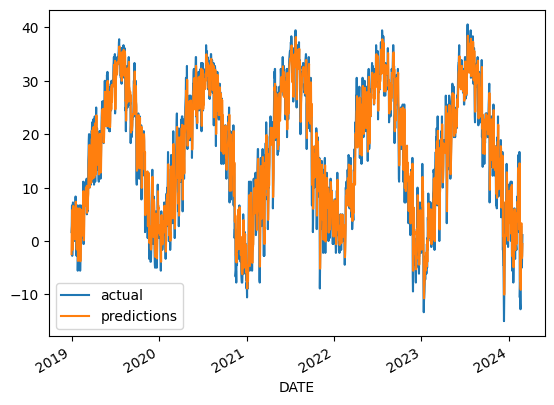

In [31]:
combined.plot()

In [32]:
core_weather["monthly_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather

<ipython-input-32-01e267d72caa>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["monthly_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,,,,
1960-01-31,26.0,37.0,18.0,-3.333333,2.777778,-7.777778,6.666667,2.000000,0.720000,-0.357143,2.777778
1960-02-01,29.0,44.0,18.0,-1.666667,6.666667,-7.777778,8.333333,1.925926,0.288889,-0.857143,6.666667
1960-02-02,31.0,47.0,27.0,-0.555556,8.333333,-2.777778,5.555556,2.092593,0.251111,-3.000000,7.500000
1960-02-03,33.0,42.0,24.0,0.555556,5.555556,-4.444444,10.555556,2.129630,0.383333,-1.250000,6.851852
1960-02-04,39.0,51.0,27.0,3.888889,10.555556,-2.777778,11.666667,2.203704,0.208772,-3.800000,7.777778
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444,3.203704,1.153333,-0.250000,1.809100
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000,2.851852,-0.641667,0.500000,1.805391
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444,2.481481,-0.496296,0.600000,1.801357


In [33]:
core_weather["day_of_year_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min",  "month_max", "day_of_year_avg", "monthly_avg"]

<ipython-input-33-dd46e9fc61d0>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  core_weather["day_of_year_avg"] = core_weather["temp_max_C"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())


In [34]:
error, combined = create_predictions(predictors, core_weather, reg)
error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.20798e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


3.0085622388074733

In [35]:
reg.coef_

array([ 7.66527414e-02,  7.01335630e-01, -8.63928516e-02,  4.23997644e-12,
        2.18447558e-12,  8.40391999e-03,  2.05210650e-01,  8.70964019e-02])

In [36]:
core_weather.corr()["target"]

temp_avg           0.919168
temp_max           0.944410
temp_min           0.907514
temp_avg_C         0.919168
temp_max_C         0.944410
temp_min_C         0.907514
target             1.000000
month_max          0.869280
month_day_max     -0.074626
max_min           -0.036737
monthly_avg        0.888165
day_of_year_avg    0.903795
Name: target, dtype: float64

In [37]:
combined["diff"] = (combined["actual"]) - combined["predictions"].abs()
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2023-01-05,14.444444,2.371562,12.072882
2021-03-24,22.222222,10.385445,11.836777
2024-02-14,16.666667,6.410282,10.256385
2023-03-04,19.444444,9.291727,10.152717
2022-11-24,15.555556,5.487331,10.068224


In [38]:
core_weather["temp_range"] = core_weather["temp_max_C"] - core_weather["temp_min_C"]
core_weather["temp_avg_diff"] = core_weather["temp_avg_C"] - core_weather["temp_min_C"]
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min", "month_max", "day_of_year_avg", "monthly_avg", "temp_range", "temp_avg_diff"]

In [39]:
error, combined = create_predictions(predictors, core_weather, reg)
error

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05825e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


3.00856225425842

In [58]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

def create_predictions(core_weather, reg, predictors):
    train = core_weather.loc[:"2018-12-31"]
    test = core_weather.loc["2019-01-01":]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )

    model_pipeline.fit(train[predictors], train["target"])
    predictions = model_pipeline.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual", "predictions"]
    return error, combined

In [59]:
predictors = ["temp_avg_C", "temp_max_C", "temp_min_C", "month_day_max", "max_min", "month_max", "day_of_year_avg", "monthly_avg", "temp_range", "temp_avg_diff"]
error, combined = create_predictions(core_weather, reg, predictors)
print("Error with additional feature engineering:", error)

Error with additional feature engineering: 2.911225921952374


In [60]:
combined

,actual,predictions
DATE,,
2019-01-01,1.666667,-2.642650
2019-01-02,2.777778,1.822392
2019-01-03,6.666667,2.876719
2019-01-04,-2.777778,4.896130
2019-01-05,-0.555556,-2.285696
...,...,...
2024-02-22,2.777778,3.689300
2024-02-23,-4.444444,4.657264
2024-02-24,-5.000000,-2.909361


<Axes: xlabel='DATE'>

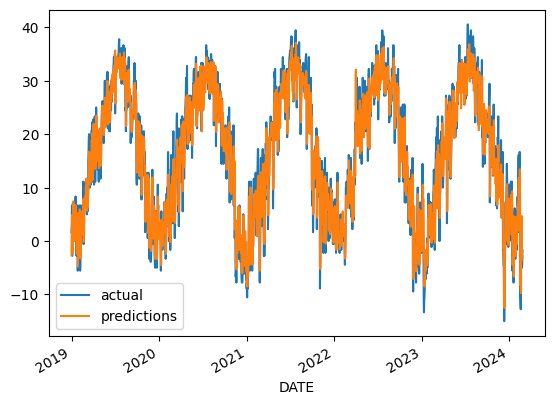

In [61]:
combined.plot()

In [45]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,temp_range,temp_avg_diff
DATE,,,,,,,,,,,,,,
1960-01-31,26.0,37.0,18.0,-3.333333,2.777778,-7.777778,6.666667,2.000000,0.720000,-0.357143,2.777778,2.777778,10.555556,4.444444
1960-02-01,29.0,44.0,18.0,-1.666667,6.666667,-7.777778,8.333333,1.925926,0.288889,-0.857143,6.666667,6.666667,14.444444,6.111111
1960-02-02,31.0,47.0,27.0,-0.555556,8.333333,-2.777778,5.555556,2.092593,0.251111,-3.000000,7.500000,8.333333,11.111111,2.222222
1960-02-03,33.0,42.0,24.0,0.555556,5.555556,-4.444444,10.555556,2.129630,0.383333,-1.250000,6.851852,5.555556,10.000000,5.000000
1960-02-04,39.0,51.0,27.0,3.888889,10.555556,-2.777778,11.666667,2.203704,0.208772,-3.800000,7.777778,10.555556,13.333333,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444,3.203704,1.153333,-0.250000,1.809100,2.879630,13.888889,8.888889
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000,2.851852,-0.641667,0.500000,1.805391,2.944444,4.444444,1.666667
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444,2.481481,-0.496296,0.600000,1.801357,2.407407,3.333333,1.111111


In [62]:
def create_prediction_27(core_weather, reg, predictors):
    train = core_weather.loc[:"2024-02-26"]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )

    model_pipeline.fit(train[predictors], train["target"])
    prediction_2024_02_28 = model_pipeline.predict(train.iloc[[-1]][predictors])
    return prediction_2024_02_28

reg = Ridge(alpha=0.1)
prediction_2024_02_27 = create_prediction_27(core_weather, reg, predictors)
print("Predicted temp_max_C for 2024-02-27:", prediction_2024_02_27)

Predicted temp_max_C for 2024-02-27: [-2.92629114]


In [47]:
core_weather["target_min"] = core_weather.shift(-1)["temp_min_C"]

In [48]:
core_weather["month_min"] = core_weather["temp_min_C"].rolling(30).mean()
core_weather["month_day_min"] = core_weather["month_min"] / (core_weather["temp_min_C"] + 1e-10)

In [52]:
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,temp_range,temp_avg_diff,target_min,month_min,month_day_min
DATE,,,,,,,,,,,,,,,,,
1960-03-01,38.0,50.0,30.0,3.333333,10.000000,-1.111111,12.777778,3.592593,0.359259,-9.00,10.000000,10.000000,11.111111,4.444444,-1.111111,-5.518519,4.966667
1960-03-02,41.0,55.0,30.0,5.000000,12.777778,-1.111111,8.888889,3.796296,0.297101,-11.50,11.388889,12.777778,13.888889,6.111111,-1.111111,-5.296296,4.766667
1960-03-03,34.0,48.0,30.0,1.111111,8.888889,-1.111111,11.111111,3.814815,0.429167,-8.00,10.555556,8.888889,10.000000,2.222222,-0.555556,-5.240741,4.716667
1960-03-04,41.0,52.0,31.0,5.000000,11.111111,-0.555556,3.333333,4.000000,0.360000,-20.00,10.694444,11.111111,11.666667,5.555556,-3.333333,-5.111111,9.200000
1960-03-05,29.0,38.0,26.0,-1.666667,3.333333,-3.333333,3.888889,3.759259,1.127778,-1.00,9.222222,3.333333,6.666667,1.666667,-10.000000,-5.129630,1.538889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444,3.203704,1.153333,-0.25,1.809100,2.879630,13.888889,8.888889,-8.888889,-6.370370,0.573333
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000,2.851852,-0.641667,0.50,1.805391,2.944444,4.444444,1.666667,-8.333333,-6.518519,0.733333
2024-02-25,19.0,23.0,17.0,-7.222222,-5.000000,-8.333333,-4.444444,2.481481,-0.496296,0.60,1.801357,2.407407,3.333333,1.111111,-8.888889,-6.648148,0.797778


In [51]:
core_weather = core_weather.iloc[30:,:].copy()

In [57]:
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,temp_avg,temp_max,temp_min,temp_avg_C,temp_max_C,temp_min_C,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg,temp_range,temp_avg_diff,target_min,month_min,month_day_min
DATE,,,,,,,,,,,,,,,,,
1960-03-01,38.0,50.0,30.0,3.333333,10.000000,-1.111111,12.777778,3.592593,0.359259,-9.00,10.000000,10.000000,11.111111,4.444444,-1.111111,-5.518519,4.966667
1960-03-02,41.0,55.0,30.0,5.000000,12.777778,-1.111111,8.888889,3.796296,0.297101,-11.50,11.388889,12.777778,13.888889,6.111111,-1.111111,-5.296296,4.766667
1960-03-03,34.0,48.0,30.0,1.111111,8.888889,-1.111111,11.111111,3.814815,0.429167,-8.00,10.555556,8.888889,10.000000,2.222222,-0.555556,-5.240741,4.716667
1960-03-04,41.0,52.0,31.0,5.000000,11.111111,-0.555556,3.333333,4.000000,0.360000,-20.00,10.694444,11.111111,11.666667,5.555556,-3.333333,-5.111111,9.200000
1960-03-05,29.0,38.0,26.0,-1.666667,3.333333,-3.333333,3.888889,3.759259,1.127778,-1.00,9.222222,3.333333,6.666667,1.666667,-10.000000,-5.129630,1.538889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,24.0,37.0,12.0,-4.444444,2.777778,-11.111111,2.777778,3.203704,1.153333,-0.25,1.808525,2.833333,13.888889,6.666667,-11.111111,-6.351852,0.571667
2024-02-23,28.0,37.0,12.0,-2.222222,2.777778,-11.111111,-4.444444,3.203704,1.153333,-0.25,1.809100,2.879630,13.888889,8.888889,-8.888889,-6.370370,0.573333
2024-02-24,19.0,24.0,16.0,-7.222222,-4.444444,-8.888889,-5.000000,2.851852,-0.641667,0.50,1.805391,2.944444,4.444444,1.666667,-8.333333,-6.518519,0.733333


In [63]:
def create_min_predictions(core_weather, reg, predictors):
    train = core_weather.loc[:"2018-12-31"]
    test = core_weather.loc["2019-01-01":]

    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )
    model_pipeline.fit(train[predictors], train["target_min"])
    predictions = model_pipeline.predict(test[predictors])
    error = mean_absolute_error(test["target_min"], predictions)
    combined = pd.concat([test["target_min"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns=["actual_min", "predictions_min"]
    return error, combined


predictors_min = [
    "temp_avg_C", "temp_max_C", "temp_min_C",
    "month_day_min", "max_min", "month_min",
    "day_of_year_avg", "monthly_avg",
    "temp_range", "temp_avg_diff"
]

reg_min = Ridge(alpha=0.1)

error_min, combined_min = create_min_predictions(core_weather, reg_min, predictors_min)
print("Error for temp_min_C prediction:", error_min)

Error for temp_min_C prediction: 1.6816874111287234


<Axes: xlabel='DATE'>

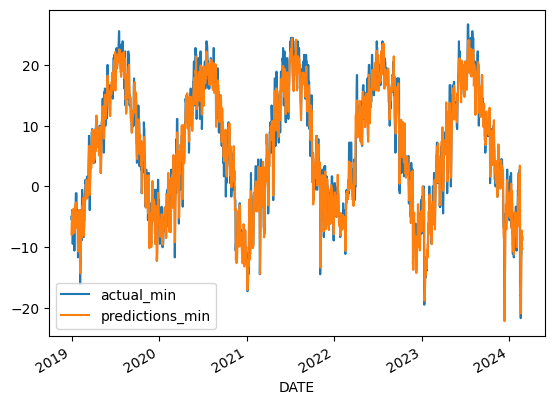

In [64]:
combined_min.plot()

In [65]:
combined_min

,actual_min,predictions_min
DATE,,
2019-01-01,-5.000000,-7.894423
2019-01-02,-5.555556,-5.909851
2019-01-03,-3.888889,-5.629466
2019-01-04,-3.888889,-4.055330
2019-01-05,-3.888889,-7.266028
...,...,...
2024-02-22,-11.111111,-7.961865
2024-02-23,-8.888889,-7.246232
2024-02-24,-8.333333,-10.252919


In [66]:
def create_min_prediction_27(core_weather, reg, predictors):
    train = core_weather.loc[:"2024-02-26"]
    model_pipeline = make_pipeline(
        PolynomialFeatures(degree=2),
        StandardScaler(),
        reg
    )
    model_pipeline.fit(train[predictors], train["target_min"])
    prediction_2024_02_27 = model_pipeline.predict(train.iloc[[-1]][predictors])
    return prediction_2024_02_27

reg_min = Ridge(alpha=0.1)
prediction_2024_02_27_min = create_min_prediction_27(core_weather, reg_min, predictors_min)
print("Predicted temp_min_C for 2024-02-27:", prediction_2024_02_27_min)

Predicted temp_min_C for 2024-02-27: [-10.2711429]


In [67]:
import joblib

# Save the reg_min model
joblib.dump(reg_min, 'reg_min_model_2.joblib')

# Save the reg model
joblib.dump(reg, 'reg_model_2.joblib')


['reg_model_2.joblib']

In [69]:
combined_min.to_csv('combined_min.csv')
combined.to_csv('combined.csv')